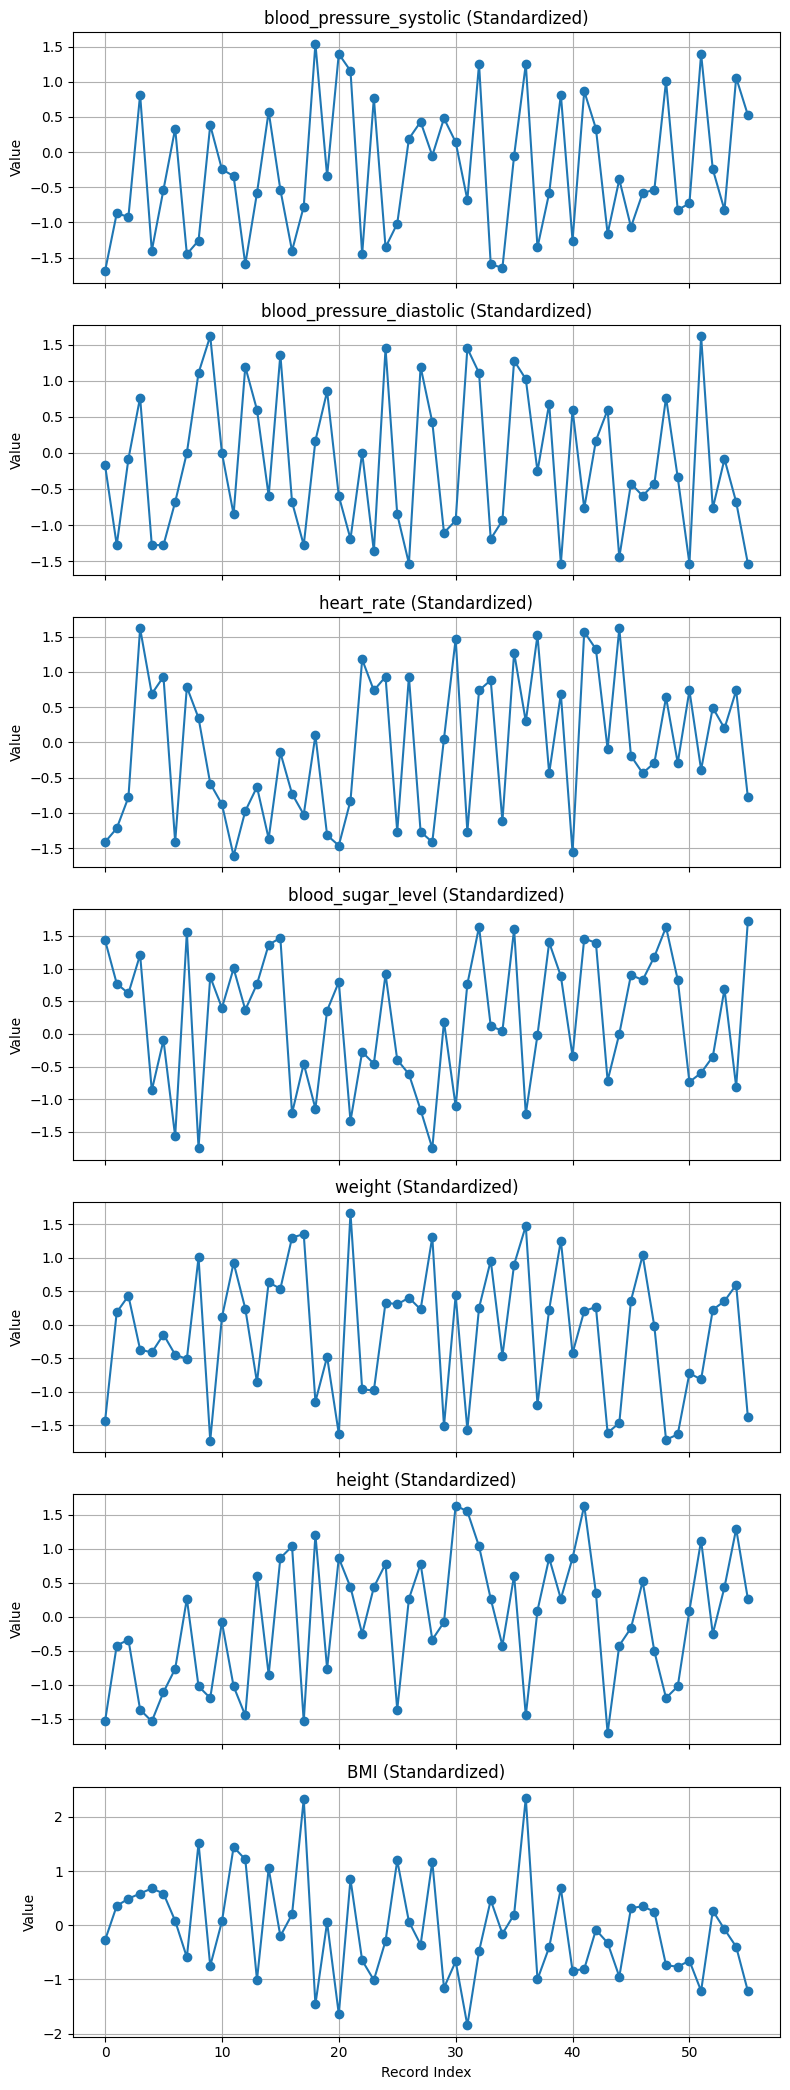

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("health_records.csv")

# Ask user for patient id
patient_id = int(input("Enter patient id: "))

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure patient_id is not standardized
if "patient_id" in numeric_cols:
    numeric_cols.remove("patient_id")

# Standardize numeric data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Filter for patient id
patient_data = df[df["patient_id"] == patient_id]

if patient_data.empty:
    print("No data found for patient id", patient_id)
else:
    patient_data = patient_data.set_index("patient_id")
    
    # Plot each metric in a separate subplot
    num_metrics = len(numeric_cols)
    fig, axes = plt.subplots(num_metrics, 1, figsize=(8, 3*num_metrics), sharex=True)

    if num_metrics == 1:
        axes = [axes]  # handle single subplot case

    for i, col in enumerate(numeric_cols):
        axes[i].plot(patient_data[col].values, marker="o", linestyle="-")
        axes[i].set_title(f"{col} (Standardized)")
        axes[i].set_ylabel("Value")
        axes[i].grid(True)

    plt.xlabel("Record Index")
    plt.tight_layout()
    plt.show()


